In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data = pd.read_csv(r'train_loan_data (1).csv')

In [113]:
pd.options.display.max_columns = None

In [114]:
data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-00,10+ years,Sports Group Manager,664,660,G,MORTGAGE,Individual,w,25.89,25850,5.0,4.0,220521.0,12,0,0.0,debt_consolidation,20201,93.5,G3,60 months,Debt consolidation,42,Verified,Defaulted
79996,NH,45000.0,Aug-95,10+ years,Web Designer,684,680,C,MORTGAGE,Individual,w,12.29,6975,2.0,2.0,245781.0,7,0,0.0,debt_consolidation,6145,56.9,C1,36 months,Debt consolidation,14,Not Verified,Paid
79997,NY,90000.0,Apr-05,< 1 year,Program Officer,724,720,B,OWN,Individual,w,10.99,7000,1.0,3.0,382274.0,9,0,0.0,debt_consolidation,3910,25.6,B4,36 months,Debt consolidation,26,Source Verified,Paid
79998,TX,94000.0,Apr-92,3 years,Sr. Business Analyst,669,665,D,MORTGAGE,Individual,w,19.47,18000,3.0,3.0,201841.0,16,1,1.0,credit_card,11897,49.4,D5,60 months,Credit card refinancing,48,Source Verified,Paid


In [116]:
data.shape

(80000, 28)

#  Exploratory Data Analysis:

In [5]:
LABELS = ['Paid','Default']

Text(0, 0.5, 'No. of Borrower’s')

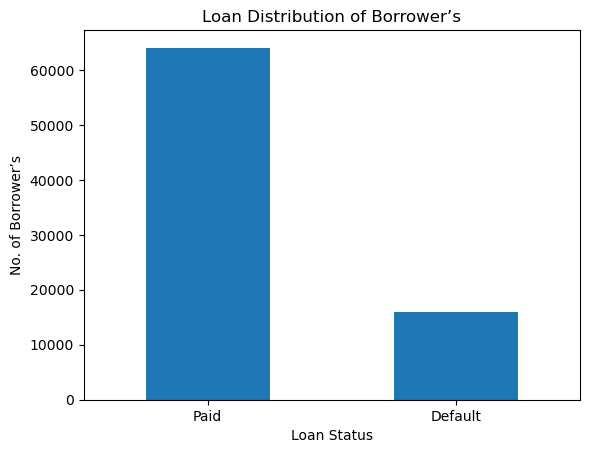

In [6]:
set_class = pd.value_counts(data['loan_status'],sort = True)
set_class.plot(kind = 'bar', rot = 0)
plt.title('Loan Distribution of Borrower’s')
plt.xticks(range(2),LABELS )
plt.xlabel('Loan Status')
plt.ylabel('No. of Borrower’s')

# Feature Selection

In [7]:
data.drop(['addr_state','earliest_cr_line','emp_title','purpose','title'],axis=1,inplace=True)

addr_state , earliest_cr_line,emp_title,purpose and title are features which not so much important for are model.
Therefore we drop them

In [8]:
data.head(1)

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,85000.0,10+ years,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,5338,93.6,E1,60 months,8,Source Verified,Defaulted


# Feature Engineering

Removing years and '+' sign from the emp_length feature

In [9]:
data['emp_length']=data['emp_length'].str.replace('years',' ')

In [10]:
data['emp_length']=data['emp_length'].str.replace('+',' ')

C:\Users\sanke\AppData\Local\Temp\ipykernel_268\134915921.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['emp_length']=data['emp_length'].str.replace('+',' ')


In [11]:
data['emp_length']=data['emp_length'].str.replace('< 1 year','0')    # 0 means less then 1

In [12]:
data['emp_length']=data['emp_length'].replace('1 year',1)

In [13]:
data['emp_length'].dtypes                                        

dtype('O')

In [14]:
data['emp_length'].astype('float')                                    

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
79995    10.0
79996    10.0
79997     0.0
79998     3.0
79999     2.0
Name: emp_length, Length: 80000, dtype: float64

In [15]:
# droping months form feature term

In [16]:
data['term']=data['term'].str.replace('months','')

In [17]:
data['term'].astype('float')

0        60.0
1        36.0
2        36.0
3        36.0
4        60.0
         ... 
79995    60.0
79996    36.0
79997    36.0
79998    60.0
79999    36.0
Name: term, Length: 80000, dtype: float64

There are many features in string category . Therefore converting them in numeric data
For this labelencoder module is used

In [18]:
from sklearn.preprocessing import LabelEncoder    

In [19]:
LE= LabelEncoder()

In [20]:
data['grade'] = LE.fit_transform(data['grade'])

In [21]:
data['home_ownership'] = LE.fit_transform(data['home_ownership'])

In [22]:
data['verification_status'].unique()                                        # to check how much unique values are present

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [23]:
data['application_type'] = LE.fit_transform(data['application_type'])

In [24]:
data['initial_list_status'] = LE.fit_transform(data['initial_list_status'])

In [25]:
data['verification_status'] = LE.fit_transform(data['verification_status'])

In [26]:
data['sub_grade'] = LE.fit_transform(data['sub_grade'])

In [27]:
data['loan_status']=data['loan_status'].map({'Paid':1,'Defaulted':0})

In [28]:
data['term'] = LE.fit_transform(data['term'])                              # 60 = 1 , 36 = 0

In [29]:
data.head(1)

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,85000.0,10,744,740,4,1,0,1,18.99,18075,1.0,1.0,319479.0,7,0,0.0,5338,93.6,20,1,8,1,0


In [30]:
data.dtypes

annual_inc              float64
emp_length               object
fico_range_high           int64
fico_range_low            int64
grade                     int32
home_ownership            int32
application_type          int32
initial_list_status       int32
int_rate                float64
loan_amnt                 int64
num_actv_bc_tl          float64
mort_acc                float64
tot_cur_bal             float64
open_acc                  int64
pub_rec                   int64
pub_rec_bankruptcies    float64
revol_bal                 int64
revol_util              float64
sub_grade                 int32
term                      int32
total_acc                 int64
verification_status       int32
loan_status               int64
dtype: object

Handling the missing values

In [31]:
data.isnull().sum()

annual_inc                 0
emp_length              4588
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [32]:
data.isnull().sum()*100/len(data)                      # How much persentage of missing values are in each feature

annual_inc              0.00000
emp_length              5.73500
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

: The rows which are having missing values less then 5% we are going to drop them ,
Only emp_length  have misssing values more then 5% so we will fill them with mode method

In [33]:
columns = ['num_actv_bc_tl','mort_acc','tot_cur_bal','revol_util']

In [34]:
data = data.dropna(subset=columns)

In [35]:
data['emp_length'].mode()[0]            # so 10 is most frequent value then we will fill the missing values with 10

'10   '

In [36]:
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])

C:\Users\sanke\AppData\Local\Temp\ipykernel_268\3510791836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])


In [37]:
data.isnull().sum()            # now there no more missing values

annual_inc              0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

In [38]:
data.duplicated().any()    # there are no duplicated in our data set

False

# Feature Scaling

There are some feature which are outliers from rest of the feature so for good accuracy they should be bring to an equal scale

In [39]:
from sklearn.preprocessing import StandardScaler        

In [40]:
sc = StandardScaler()

In [41]:
# living 	loan_status , term , application_type , initial_list_status every feature needs to scaling
# this features does not need scaling

In [ ]:
annual_inc emp_length fico_range_high fico_range_low grade home_ownership int_rate loan_amnt num_actv_bc_tl mort_acc tot_cur_bal 
open_acc pub_rec pub_rec_bankruptcies revol_bal revol_util sub_grade total_acc

In [42]:
data['annual_inc'] = sc.fit_transform(pd.DataFrame(data['annual_inc']))
data['emp_length'] = sc.fit_transform(pd.DataFrame(data['emp_length']))
data['fico_range_high'] = sc.fit_transform(pd.DataFrame(data['fico_range_high']))
data['fico_range_low'] = sc.fit_transform(pd.DataFrame(data['fico_range_low']))
data['grade'] = sc.fit_transform(pd.DataFrame(data['grade']))
data['home_ownership'] = sc.fit_transform(pd.DataFrame(data['home_ownership']))
data['int_rate'] = sc.fit_transform(pd.DataFrame(data['int_rate']))
data['loan_amnt'] = sc.fit_transform(pd.DataFrame(data['loan_amnt']))
data['num_actv_bc_tl'] = sc.fit_transform(pd.DataFrame(data['num_actv_bc_tl']))
data['mort_acc'] = sc.fit_transform(pd.DataFrame(data['mort_acc']))
data['tot_cur_bal'] = sc.fit_transform(pd.DataFrame(data['tot_cur_bal']))
data['open_acc'] = sc.fit_transform(pd.DataFrame(data['open_acc']))
data['pub_rec'] = sc.fit_transform(pd.DataFrame(data['pub_rec']))
data['pub_rec_bankruptcies'] = sc.fit_transform(pd.DataFrame(data['pub_rec_bankruptcies']))
data['revol_bal'] = sc.fit_transform(pd.DataFrame(data['revol_bal']))
data['revol_util'] = sc.fit_transform(pd.DataFrame(data['revol_util']))
data['sub_grade'] = sc.fit_transform(pd.DataFrame(data['sub_grade']))
data['total_acc'] = sc.fit_transform(pd.DataFrame(data['total_acc']))

C:\Users\sanke\AppData\Local\Temp\ipykernel_268\1543270664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['annual_inc'] = sc.fit_transform(pd.DataFrame(data['annual_inc']))
C:\Users\sanke\AppData\Local\Temp\ipykernel_268\1543270664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['emp_length'] = sc.fit_transform(pd.DataFrame(data['emp_length']))
C:\Users\sanke\AppData\Local\Temp\ipykernel_268\1543270664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [43]:
data

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,0.121717,1.016835,1.428520,1.428563,1.742009,-0.990837,0,1,1.192239,0.407194,-1.165583,-0.337993,1.116721,-0.852697,-0.381446,-0.364829,-0.482592,1.713875,1.441559,1,-1.425550,1,0
1,-0.520647,1.016835,0.790647,0.790673,-0.582511,1.099904,0,1,-0.647128,-0.655422,0.160985,-0.837419,-0.763255,-1.215547,-0.381446,-0.364829,0.153279,0.345647,-0.889776,0,-1.093335,2,1
2,-0.235152,1.016835,-0.644567,-0.644579,-0.582511,-0.990837,0,1,-0.374243,0.398602,0.160985,0.161433,-0.742826,-0.852697,-0.381446,-0.364829,0.294985,1.504326,-0.268086,0,-0.761119,1,1
3,0.346430,1.016835,-1.122972,-1.122996,-0.582511,-0.990837,0,1,-0.855437,0.627737,0.160985,-0.337993,-0.432449,0.054428,-0.381446,-0.364829,0.087149,0.703112,-0.734353,0,-0.511957,1,1
4,0.050343,1.016835,-0.963504,-0.963523,2.516848,1.099904,0,0,2.200453,2.346254,4.582879,2.658566,-0.482785,2.050102,-0.381446,-0.364829,0.781313,1.565958,2.840360,1,2.810199,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.064618,1.016835,-1.122972,-1.122996,3.291688,-0.990837,0,1,2.629569,1.297959,0.603174,1.160286,0.495629,0.054428,-0.381446,-0.364829,0.164467,1.709766,3.306627,1,1.398282,2,0
79996,-0.449273,1.016835,-0.485099,-0.485106,0.192329,-0.990837,0,1,-0.203430,-0.864509,-0.723394,0.161433,0.654169,-0.852697,-0.381446,-0.364829,-0.447459,0.205949,-0.112664,0,-0.927227,0,1
79997,0.193090,-1.689043,0.790647,0.790673,-0.582511,0.577219,0,1,-0.474231,-0.861644,-1.165583,0.660860,1.510842,-0.489847,-0.381446,-0.364829,-0.544760,-1.080103,-0.423509,0,0.069420,1,1
79998,0.250189,-0.877280,-0.963504,-0.963523,0.967169,-0.990837,0,1,1.292227,0.398602,-0.281204,0.660860,0.378388,0.780128,1.309355,2.200078,-0.197047,-0.102211,1.286137,1,1.896606,1,1


This dataset consist of more then 70 thounsand entries so it is time consuming
Therefore instead of training the whole data we take an sample of 1000 rows of both paid and default status

In [44]:
Paid = data[data['loan_status']==1]
Defaulted = data[data['loan_status']==0]

In [117]:
Paid.shape

(60638, 23)

In [46]:
Defaulted.shape

(15368, 23)

In [47]:
Paid_1000 = Paid.sample(n=1000)                       #1000 sample of paid status

In [48]:
Defaulted_1000 = Defaulted.sample(n=1000)                  #1000 sample of default status

In [49]:
new_data = pd.concat([Paid_1000,Defaulted_1000],ignore_index = True)

In [50]:
new_data.shape

(2000, 23)

# Spliting the data into train & test sets


spliting the data in x and y in x consist of independent features and y contains dependent

In [51]:
X = new_data.drop('loan_status',axis = 1)
y =new_data['loan_status']

In [52]:
X.shape

(2000, 22)

In [53]:
y.shape

(2000,)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score

In [55]:
# calling a function so that we can train multiply model and repeting the same process agian and again

In [56]:
model_df={}
def model_val(model, X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                     test_size=0.20,
                                                     random_state = 42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

    score =cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score) *100,2)

# LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [59]:
model_val(model,X,y)

LogisticRegression() accuracy is 0.6775
LogisticRegression() Avg cross val score is 0.6665


# DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
model = DecisionTreeClassifier()

In [62]:
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.5425
DecisionTreeClassifier() Avg cross val score is 0.5594999999999999


# RandomForestClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model = RandomForestClassifier()

In [65]:
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.6475
RandomForestClassifier() Avg cross val score is 0.639


# GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
model = GradientBoostingClassifier()

In [68]:
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.66
GradientBoostingClassifier() Avg cross val score is 0.643


# SVC

In [69]:
from sklearn.svm import SVC

In [70]:
model = SVC()

In [71]:
model_val(model,X,y)

SVC() accuracy is 0.6725
SVC() Avg cross val score is 0.6545


In [72]:
model_df

{LogisticRegression(): 66.65,
 DecisionTreeClassifier(): 55.95,
 RandomForestClassifier(): 63.9,
 GradientBoostingClassifier(): 64.3,
 SVC(): 65.45}

LogisticRegression has the most accuracy with 66.65% in all of the methods , so we will do the tuning with logisticregression

# Hyperparameter Tuning 

In [73]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [74]:
hyper_logReg = {'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

In [75]:
rs_hyper_log = GridSearchCV(LogisticRegression(),                          # GridseearchCV will try every input combination
                                 param_grid=hyper_logReg, 
                                 n_jobs=20,cv=5,verbose=True)

In [76]:
rs_hyper_log.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=20,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [77]:
rs_hyper_log.best_score_

0.667

In [78]:
rs_hyper_log.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

'C': 1.623776739188721, 'solver': 'liblinear' are the best parameters . Therefore we will try are data again with this parameters

 # Model Improvement:

In [79]:
from sklearn.linear_model import LogisticRegression

In [110]:
model = LogisticRegression(solver = 'liblinear', C= 1.623776739188721)

In [111]:
model_val(model,X,y)

LogisticRegression(C=1.623776739188721, solver='liblinear') accuracy is 0.675
LogisticRegression(C=1.623776739188721, solver='liblinear') Avg cross val score is 0.667


The final score of our model after tuning is 67.5%

# Test the model with the test_data csv

In [82]:
test_data = pd.read_csv(r'test_loan_data (1).csv')

In [83]:
test_data.head(1)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,f,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified


the same feature selection , feature engineering , feature scaling should be done to the test data for good accuracy

In [84]:
test_data.drop(['addr_state','earliest_cr_line','emp_title','purpose','title'],axis=1,inplace=True)

In [85]:
test_data['emp_length']=test_data['emp_length'].str.replace('years',' ')

In [86]:
test_data['emp_length']=test_data['emp_length'].str.replace('+',' ')

C:\Users\sanke\AppData\Local\Temp\ipykernel_268\3869259593.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_data['emp_length']=test_data['emp_length'].str.replace('+',' ')


In [87]:
test_data['emp_length']=test_data['emp_length'].str.replace('< 1 year','0')

In [88]:
test_data['emp_length']=test_data['emp_length'].replace('1 year',1)

In [89]:
test_data['emp_length'].dtypes

dtype('O')

In [90]:
test_data['emp_length'].astype('float')

0         1.0
1        10.0
2        10.0
3         9.0
4         NaN
         ... 
19995     4.0
19996     3.0
19997    10.0
19998    10.0
19999     0.0
Name: emp_length, Length: 20000, dtype: float64

In [91]:
test_data['term']=test_data['term'].str.replace('months','')

In [92]:
test_data['term'].astype('float')

0        36.0
1        36.0
2        60.0
3        36.0
4        36.0
         ... 
19995    36.0
19996    60.0
19997    36.0
19998    36.0
19999    60.0
Name: term, Length: 20000, dtype: float64

In [93]:
test_data['grade'] = LE.fit_transform(test_data['grade'])

In [94]:
test_data['home_ownership'] = LE.fit_transform(test_data['home_ownership'])

In [95]:
test_data['application_type'] = LE.fit_transform(test_data['application_type'])

In [96]:
test_data['initial_list_status'] = LE.fit_transform(test_data['initial_list_status'])

In [97]:
test_data['verification_status'] = LE.fit_transform(test_data['verification_status'])

In [98]:
test_data['sub_grade'] = LE.fit_transform(test_data['sub_grade'])

In [99]:
test_data['term'] = LE.fit_transform(test_data['term'])         

In [100]:
test_data.head(1)

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status
0,50000.0,1,719.0,715.0,2,2,0,0,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,2568.0,9.8,13,0,11.0,1


In [101]:
test_data.isnull().sum()*100/len(data)

annual_inc              0.000000
emp_length              1.655132
fico_range_high         0.000000
fico_range_low          0.000000
grade                   0.000000
home_ownership          0.000000
application_type        0.000000
initial_list_status     0.000000
int_rate                0.000000
loan_amnt               0.000000
num_actv_bc_tl          1.330158
mort_acc                0.926243
tot_cur_bal             1.330158
open_acc                0.000000
pub_rec                 0.000000
pub_rec_bankruptcies    0.014473
revol_bal               0.000000
revol_util              0.017104
sub_grade               0.000000
term                    0.000000
total_acc               0.000000
verification_status     0.000000
dtype: float64

Row cannot be drop as we have to test whole data so we fill the missing values with modes of there data

In [102]:
test_data['emp_length'] = test_data['emp_length'].fillna(test_data['emp_length'].mode()[0])
test_data['num_actv_bc_tl'] = test_data['num_actv_bc_tl'].fillna(test_data['num_actv_bc_tl'].mode()[0])
test_data['mort_acc'] = test_data['mort_acc'].fillna(test_data['mort_acc'].mode()[0])
test_data['tot_cur_bal'] = test_data['tot_cur_bal'].fillna(test_data['tot_cur_bal'].mode()[0])
test_data['pub_rec_bankruptcies'] = test_data['pub_rec_bankruptcies'].fillna(test_data['pub_rec_bankruptcies'].mode()[0])

In [103]:
test_data['revol_util'] = test_data['revol_util'].fillna(test_data['revol_util'].mode()[0])

In [104]:
test_data.isnull().sum()

annual_inc              0
emp_length              0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
total_acc               0
verification_status     0
dtype: int64

In [105]:
test_data['emp_length'] = sc.fit_transform(pd.DataFrame(test_data['emp_length']))
test_data['fico_range_high'] = sc.fit_transform(pd.DataFrame(test_data['fico_range_high']))
test_data['fico_range_low'] = sc.fit_transform(pd.DataFrame(test_data['fico_range_low']))
test_data['grade'] = sc.fit_transform(pd.DataFrame(test_data['grade']))
test_data['home_ownership'] = sc.fit_transform(pd.DataFrame(test_data['home_ownership']))
test_data['int_rate'] = sc.fit_transform(pd.DataFrame(test_data['int_rate']))
test_data['loan_amnt'] = sc.fit_transform(pd.DataFrame(test_data['loan_amnt']))
test_data['num_actv_bc_tl'] = sc.fit_transform(pd.DataFrame(test_data['num_actv_bc_tl']))
test_data['mort_acc'] = sc.fit_transform(pd.DataFrame(test_data['mort_acc']))
test_data['tot_cur_bal'] = sc.fit_transform(pd.DataFrame(test_data['tot_cur_bal']))
test_data['open_acc'] = sc.fit_transform(pd.DataFrame(test_data['open_acc']))
test_data['pub_rec'] = sc.fit_transform(pd.DataFrame(test_data['pub_rec']))
test_data['pub_rec_bankruptcies'] = sc.fit_transform(pd.DataFrame(test_data['pub_rec_bankruptcies']))
test_data['revol_bal'] = sc.fit_transform(pd.DataFrame(test_data['revol_bal']))
test_data['revol_util'] = sc.fit_transform(pd.DataFrame(test_data['revol_util']))
test_data['sub_grade'] = sc.fit_transform(pd.DataFrame(test_data['sub_grade']))
test_data['total_acc'] = sc.fit_transform(pd.DataFrame(test_data['total_acc']))

In [106]:
test_data.head(1)

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,sub_grade,term,total_acc,verification_status
0,50000.0,-1.407936,0.591656,0.591674,0.193571,0.105825,0,0,0.153094,-1.069855,-1.19284,-0.81734,-0.649586,-0.470876,-0.365681,-0.349326,-0.621159,-1.706683,0.354344,0,-1.159012,1


In [107]:
Final_Result = model.predict(test_data)

In [108]:
Final_Result

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)